In [9]:
### 3 Classes!
import requests
from datetime import datetime as time
import pandas as pd
from matplotlib import pyplot as plt
# import tmdbsimple
import numpy as np
import os 
# import colored

class DataBase:
    """
    This parent class takes the 'BoxOffice 90's - 2020' Dataset archived
    inside a .csv file, and clean it using Pandas! Then returns the Data 
    Frame assining it to the object 'self.clean_DataSet' to be used by
    the child classes!
    """
    """
    When we need to create objects refering to dates such 1990, we will
    use '90' instead, '70', '60' and so on. If you see '90_20' that can
    be seen as 'from the 90s until 2020'. The past should always come
    first! There is no 'from the 1990 until 1950', only 1950 until 1990!
    --> 'BO' and 'bo' stands for BoxOffice! 
    --> 'bo_90_20' stands for: BoxOffices from the 90s until 2020
    --> TMDb stands for The Movie DataBase.org
    --> IMDb stands for the famous IMDb
    --> BOMDb stands for BoxOffice Mojo DataBase
    --> DS for DataSet and DF for DataFrame
    """
    """
    For now, our app relys on this single dataset ('BoxOffice 90's - 2020') 
    but in the future it will have methods to request data from APIs,
    and methods to mix the requested data with all collected DataFrames 
    in one single obj 'self.clean_DataSet' that is already in use.
    """
    """
    ## Commented Methods ## are there to be pseudo-codes for future updates!
    """
    def __init__(self):
        # to be used if we need to create our own dataframe .csv file!
        self.file_path = ''
        # The clean DataSet that will be used by all users iteration!
        self.clean_DataSet = None
        # When we have to store Data Frames made by collecting info from
        # the following websites APIs.
        self.TMDb = None
        self.IMDb = None
        self.BOMDb = None
        
        # The BoxOffice Dataset from the 90's until April 2020, 
        # WITH release date!
        self.__bo_90_20 = 'dataset_mojo_budget_update_from_1990_until_04_20.csv'
        # The BoxOffice Dataset from all years until 2019,
        # WITHOUT release date!
        self.__bo_all_19 = 'datasets_boxoffice_alltime_until_august_2019.csv'

    def __TMDb_cleaning(self):
        """
        For future updates!
        """
        # requests TMDb API
        # Pandas
        pass

    def __IMDb_cleaning(self):
        """
        For future updates!
        """
        # Requests API
        # Pandas
        pass

    def __BOMDb_cleaning(self):
        """
        For future updates!
        """
        # Requests API
        # Pandas
        pass

    def BO_DS_cleaning(self):
        """
        This method clean the local stored .csv file that holds the
        'BoxOffice 90's - 2020' data, using Pandas, then return a single
        Data Frame inside the object 'self.clean_DataSet' to be used by
        child Classes!
        """
        bo_df = pd.read_csv(self.__bo_90_20)
        bo_df.drop(labels = [
            'trivia','mpaa','run_time','distributor','director',
            'composer','cinematographer','writer','main_actor_1',
            'main_actor_2','main_actor_3','main_actor_4','producer','html'
            ], axis='columns', inplace=True)
        # print('\n')
        # print('raw dataframe')
        # print(bo_df.head(5))
        # print('\n')
        # print('clean dataframe')
        
        bo_df['date'] = bo_df['year'].astype(str) + ' ' + bo_df['release_date']
        cols = bo_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        bo_df = bo_df[cols]
        bo_df['budget'] = bo_df['budget']/1000000
        bo_df['date'] = pd.to_datetime(bo_df['date'])
        bo_df.drop(labels = ['year','release_date'], axis='columns', inplace=True)
        # print(bo_df.head(5))
        # print('\n')
        #print(bo_df.tail(5))
        self.clean_DataSet = bo_df
        return self.clean_DataSet

    def __DataSet_generator(self):
        """
        For future updates!
        """
        # if Public TMDb, IMDb and BOMDb exists:
        #     if Day Date == Today:
        #         Pandas
        #         Data Set
        # else:
        #     Call __private_method_TMDb_cleaning.requests()
        #     Pandas
        #     DataSet
        pass


In [10]:
class Date(DataBase):
    """
    This child Class from 'class DataBase()' asks the user input using
    the '__date_input()'. And, with the input provided by the user
    the '__Pandas_filter()' will use Pandas to iterate over the public 
    self.clean_DataSet from the Parent Class, using the 'date' column as
    a filter with the '.query()' method. 
    All of this is activated by the 'graphic_view()' public method, this
    method calls for the other two (__date and __filter), and with what 
    they return, 'graphic_view()' will pass the DataFrame values to
    MatPlotLib built-in methods to display the graphics! 
    """
    
    def __Pandas_filter(self,date = None):
        """
        This method activates the parent Class DataBase() and assign the
        'self.clean_DataSet' into a local 'df' object. Then uses the 
        user input Date to filter the DF and return only the info asked.
        If the users by mistake hits 'enter' without providing any date,
        this method will assume a default date of '1990-07-06', when 
        Die Hard 2 was released. 
        """
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        
        # Die Hard 2 release date in U.S.
        default_date = '1990-07-06'
        # this format was the only one that worked for me, link beneath
        date = default_date if date is None else date
        # https://stackoverflow.com/questions/52494128/call-function-without-optional-arguments-if-they-are-none
        try:
            self.date = pd.to_datetime(date)
            # print(df.query("date == @self.date"))
            self.df_filter = df.query("date == @self.date")
            print('\n')
            print(self.df_filter[['title', 'date', 'budget','genre_1']])
            print('\n')
            return self.df_filter
        except ValueError:
            print('\nPlease insert a valide date format!\n')

    def __date_input(self,date=None):
        """
        This method uses a While Loop to ask the User for a valid input,
        if the user cannot meet the creterea of typing the date asked in
        the '21 November 2019, or 2019-11-21' formats, the loop will
        keep asking the User to try again. This formats are the ones
        accepted by Pandas built-in method '.to_datetime()', which was
        used to convert the 'date' column inside our DataFrame, and will
        be used again to validate the users input!
        The provided input will be assigned as 'self.input_date' and 
        this method will call for 'self.__Pandas_filter()' passing the
        input as an argument! 
        Besides that, if the user by mistake hits 'enter' without 
        providing anything, the input will be seen as 'None' and passed 
        to the 'self.__Pandas_filter()' method anyway, activating it's
        Default Date value.
        """
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        while True:
            try:
                date = input("\nWhat date do you want to analize?\nExample: 21 November 2019, or 2019-11-21\n\tType one style here->")
                
                if date == '':
                    date = None
                    self.input_date = date
                    # print('\n DONE None \n')
                    # Exit the loop if success!
                    break
                else: 
                    self.input_date = pd.to_datetime(date)
                    does_it_exist = df.isin([self.input_date]).any().any()
                    # print('\nit cames this far\n')
                    if does_it_exist:
                        self.input_date = pd.to_datetime(date)
                        # print('\n DONE to Date Time \n')
                        # Exit the loop if success!
                        break
                    else:
                        print("\nMaybe this isn't in our database, try some another date in between the 90's and 2020-04-01!\n")
                    # Exit the loop if success!
                    
            except ValueError: 
                print("\nSorry, I didn't understand that.\nExemples of valid formats are:\n21 November 2019 or 2019-11-21\n")
                # let's try again without breaking the code...
                continue
        
        # self.input_date = pd.to_datetime(date)
        self.__Pandas_filter(self.input_date)
        
    def graphic_view(self):
        """
        This is the only public method of the child Class Date()! It
        calls for 'self.__date_input()', which will asks for the users
        input in date format. 
        It'll take the returned values from the methods above and their
        public self.objects and use it to generate a graphic view of the
        results of 'self.__Pandas_filter()' !!!
        """
        self.__date_input()
        
        df_plot_full = self.clean_DataSet
        df_cut = self.df_filter
        
        # displaying the graphics of the specific day searched!
        df_cut.plot(kind='bar', x='genre_1', y='budget',figsize=(10, 5)).set_title('This day Budget per Genre in Million', fontsize="15", color="red")
        plt.xlabel('Genre/Title')
        plt.ylabel('Budget')
        plt.show()
        
        # Function that clean/slice '1990-05-25' into '1990-05'
        self.clean_DataSet.iloc[0,0].strftime("%Y-%m")
        def extract_month(month):
            month = month.strftime("%Y-%m-%d")
            clean_month = month[0:7]
            return clean_month
        
        # Droping out NaN values to not run into an error!
        df_plot_full = df_plot_full.dropna(subset=['date', 'genre_1'])
        
        # Applying the above function to a whole column 'date' and creating a Series from it!
        date_from_full = pd.Series(df_plot_full['date'].apply(extract_month))
        date_from_cut = pd.Series(df_cut['date'].apply(extract_month))
        
        # Inserting the series into our DFs as a new column Month!
        df_plot_full.insert(0, "Month", date_from_full)
        df_cut.insert(0, "Month", date_from_cut)
        
        # Filtering out the main DF with the User DF to create a graphics with only that range of time!
        cut_and_full_df = df_plot_full[df_plot_full.Month.isin(df_cut.Month)]
        
        #cut_and_full_df.plot(kind='bar', x='genre_1', y='budget',figsize=(10, 5))
        #plt.xlabel('Genre')
        #plt.ylabel('Budget in Millions')
        #plt.show()
        
        # Month Budget per Genre in Millions!
        cut_and_full_df.groupby('genre_1')['budget'].sum().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('This month Budget per Genre in Million', fontsize="15", color="red")
        plt.xlabel('Genre')
        plt.ylabel('Budget in Millions')
        plt.show()
        
        # Month Budget per Genre in Millions WITH STACKED COLLORS!
        cut_and_full_df.groupby(['genre_1','budget']).size().unstack().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('This month Budget/Title per Genre in Million', fontsize="15", color="red")
        plt.show()
        
        # How much budget each title spent this month!
        cut_and_full_df = df_plot_full[df_plot_full.Month.isin(df_cut.Month)]
        cut_and_full_df.plot(kind='bar', x='title', y='budget',figsize=(10, 5)).set_title('Movies Budgets', fontsize="15", color="red")
        plt.xlabel('Title')
        plt.ylabel('Budget in Millions')
        plt.show()
        
        gen_v = cut_and_full_df["genre_1"].value_counts()
        
        # A bar graphic highlighting how many 'titles' per 'genre_1' were released at this month!
        cut_and_full_df.groupby(['genre_1','title']).size().unstack().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('Genres per Movies', fontsize="15", color="red")
        plt.xlabel('Genre')
        plt.ylabel('Quantity of Movies')
        plt.show()
        #cut_and_full_df.groupby('genre_1')['title'].nunique().plot(kind='bar')
        #plt.show()
        #print(cut_and_full_df["genre_1"].value_counts())
        
        # Highest and Lowest budget Titles!
        a = df_plot_full['budget'].max()
        z = df_plot_full['budget'].min()
        
        df_plot_full.query("budget == @a or budget == @z").groupby(['title','budget']).size().unstack().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('Highest and Lowest Budgets 1990-2020/04', fontsize="15", color="red")
        plt.show()
        
        df_plot_full.query("budget == @a or budget == @z").plot(kind='scatter', x='title', y='budget',figsize=(10, 5)).set_title('Highest and Lowest Budgets 1990-2020/04', fontsize="15", color="red")
        plt.legend(['budget','title'])
        plt.show()

        # Function that clean/slice '1990-05-25' into '1990'
        def extract_year(year):
            year = year.strftime("%Y-%m-%d")
            clean_year = year[0:5]
            return clean_year
        
        # Applying the function to a whole column 'date' and creating a Series from it!
        only_year = pd.Series(df_plot_full['date'].apply(extract_year))
        df_plot_full.insert(0, "year", only_year)
        # print(df_plot_full.groupby('year')['budget'].mean())
        
        # The mean of each year budget!
        df_plot_full.groupby('year')['budget'].mean().plot(kind='line', x='year', y='budget',figsize=(10, 5)).set_title('Mean of budget invested in movies per year 1990-2020/04', fontsize="15", color="red")
        plt.legend()
        plt.show()
        
        # The sum of all budgets per year!
        df_plot_full.groupby('year')['budget'].sum().plot(kind='line', x='year', y='budget',figsize=(10, 5)).set_title('The sum of all budgets invested in movies by year 1990-2020/04', fontsize="15", color="red")
        plt.legend()
        plt.show()
        
        # The total derivation!
        #df_plot_full.groupby('year')['budget'].std().plot(kind='line', x='year', y='budget',figsize=(10, 5)).set_title('Movies deviation per year 1990-2020', fontsize="15", color="red")
        #plt.show()


class Name(DataBase):
    """
    Instead of using date as a filter to iterate over our Parent Class' 
    "self.clean_DataSet" obj, this class will ask for the user to input 
    the full name of the desired movie! It uses the 'name_input()' 
    method to ask for the user to provide a name. After a valid input, 
    this class calls for the "__Pandas_filter()" method to generate a DF.
    Then, this method checks if the name is a duplicated element in the 
    'title' columns inside our Data Frame.
    If duplicated names exists, 'name_input()' will return a Data Frame 
    with the duplicated names and their release date, then it calls the
    'class Date()' for the user to insert their chosen date instead, 
    giving a more accurated result!
    If it's not duplicated, it simples call for the 'Date.graphic_view()'
    method passing the current DF filtered by 'title'.
    """
    
    def __Pandas_filter(self,name = None):
        """
        This method activates the parent Class DataBase() and assign the
        'self.clean_DataSet' into a local 'df' object. Then uses the 
        user input Name to filter the DF and return only the info asked.
        If the users by mistake hits 'enter' without providing any Title,
        this method will assume a default name of 'Get Out'. 
        """
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        # print(df)
        # Get Out as default name if nothing is typed!
        default_name = 'Get Out'
        name = default_name if name is None else name
        try:
            self.name = name
            #print('\n')
            #print(df.query("title == @self.name"))
            self.df_name_filter = df.query("title == @self.name")
            #print('\n')
            #print(self.df_name_filter[['title', 'date', 'budget','genre_1']])
            #print('\n')
            return self.df_name_filter
        except ValueError:
            print('\nPlease insert a valide name!\n')
        
        
    def name_input(self,name=None):
        """
        This method uses a While Loop to ask the User for a valid input,
        if the user cannot meet the creterea of typing a valid movie 
        name, the loop will keep asking the User to try again. 
        This Loop will help us in the case of the User assuming that a
        certain movie should exists in our DataBase, if the User is
        wrong, or if the DataBase is lacking information, either way the
        code will not break, and the loop will simply ask again for any
        valid name! 
        Besides that, if the user by mistake hits 'enter' without typing
        anything, the input will be seen as 'None' and be passed to the 
        'self.__Pandas_filter()' method anyway, activating it's
        Default Name value.

        After 'self.__Pandas_filter()' generates a DF that will be 
        assigned to "df_name", We'll check if the name is a duplicated 
        element in the 'title' columns inside our Data Frame. If True,
        'name_input()' will return a DF with the duplicated elements and
        their release dates, then it calls the 'class Date()' for the 
        user to insert their chosen date instead, giving a more 
        accurated result!
        If it's not duplicated, it simples call for the Data() method
        'Date.graphic_view()' passing the current DF filtered by 'title'.
        """
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        while True:
            try:
                name = input("\nWhat movie name do you want to analize?\nExample: Die Hard 2, or Get Out\n\tType one name here->")
                does_it_exist = df.isin([name]).any().any()
                if does_it_exist:
                    self.input_name = name
                    # Exit the loop if success!
                    break
                elif name == '':
                    name = None
                    self.input_name = name
                    # Exit the loop if success!
                    break
                else:
                    self.input_name = name
                    self.__collecting_missing_names(self.input_name)
                    print("\nMaybe this isn't in our database, try one movie released between the 90's and April 2020!\n")
            except ValueError: 
                print("\nSorry, I didn't understand that.\nCan you try again?")
                # let's try again without breaking the code...
                continue
        
        
        # self.input_name = pd.to_datetime(name)
        self.__Pandas_filter(self.input_name)

        df_name = self.df_name_filter
        # print(df_name[['title', 'date', 'budget']])
        # check if duplicate
        if len(df_name.index) > 1:
            print('\n')
            print(self.df_name_filter)
            print('\nIt should have duplicateds!\n')
            # print(df_name)
            print("\nPlease, choose one of the dates and insert next!\n")
            better_method = Date()
            better_method.graphic_view()
        else:
            print('\n')
            print(df_name[['title', 'date', 'budget','genre_1']])
            print('\n')
            print('Type the date of this movie next!')
            better_method = Date()
            better_method.graphic_view()

    
    def __collecting_missing_names(self,name):
        """
        This method will work collecting every name inserted by the user
        that are not in our DataSet, or wasn't understood by our code.
        This way, we can latter decide what the best 'regex' option to
        help our code accept short names, e.g. is it okay to use "Harry"
        to search for the "Harry Potter" francheise? Or people type
        "Harry Potter" anyway, so should we just filter by that? Because
        "Harry" alone could let our code bring unnecessery movies.
        Besides that, we can also use these names to iterate over an API
        and gradually fill up the gaps of our DataSet, instead of trying
        to requests all movies at once, requesting only what our users
        want.
        And finally, we can create another app just to see what are the
        words that our users most associate with movies/budgets/profit,
        and take decisions and analizes over this totally different
        subject. Either way, this method will be really handy in the
        future!
        """
        """
        This method will be called inside the 'Try/Except' block of our
        name_input() method. If the name is not known, this method is
        called and the user input is passed as an argument for this
        method.
        """
        # user input previously used for name_input() will be reassigned
        # to self.m_name!
        self.m_name = name
        try:
            # this is how we will call our .csv file for missing names
            missing_name_file_path = 'needed_names.csv'
            # this is to check if the file already exists!
            isFile = os.path.isfile(missing_name_file_path)
            does_it_exist = isFile
            # If exists, call the method 'update_file' which will append
            # the new data!
            if does_it_exist:
                self.__update_file(self.m_name)
                print('\n\tFile Updated!\n')
            # else, call the method 'new_file' which will write this
            # new file from scretch!
            else:
                self.__new_file(self.m_name)
                print("\n\tFile Created!\n")
        except ValueError: 
            print("\nPROBLEM WITH MISSING FILE NAME\n")
            
    def __new_file(self,name):
        """
        This is the method that creates a new file for missing names
        inputs, using 'open(,'write')'!
        """
        missing_name = name
        try:
            with open('needed_names.csv', 'w') as f:
                f.write("%s;\n"%(missing_name))
            f.close()
        except IOError:
            print('\nFile could not Update!\n')

    def __update_file(self,name):
        """
        This is the method that updates a new file for missing names
        inputs, using 'open(,'append')'!
        """
        missing_name = name
        try:
            with open('needed_names.csv', 'a') as f:
                f.write("%s;\n"%(missing_name))
            f.close()
        except IOError:
            print('\nFile could not Update!\n')

In [11]:
# '21 November 2019'
# '2019-11-21'

a = DataBase()
a.BO_DS_cleaning()
# a.private

,date,movie_id,title,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,1990-05-25,tt0099088,Back to the Future Part III,40.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,1990-12-22,tt0099165,The Bonfire of the Vanities,47.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,1990-11-09,tt0099348,Dances with Wolves,22.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,1990-06-15,tt0099422,Dick Tracy,47.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,1990-07-06,tt0099423,Die Hard 2,70.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3238,2019-07-03,tt8772262,Midsommar,9.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,2019-11-21,tt8946378,Knives Out,40.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,2019-03-29,tt9024106,Unplanned,6.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,2019-11-07,tt9134216,Playing with Fire,29.9,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN



What date do you want to analize?
Example: 21 November 2019, or 2019-11-21
	Type one style here->


        title       date  budget genre_1
4  Die Hard 2 1990-07-06    70.0  Action




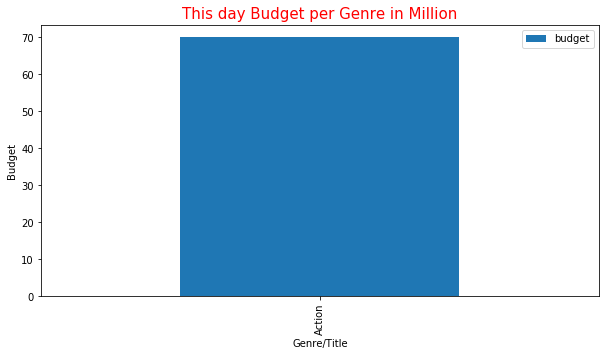

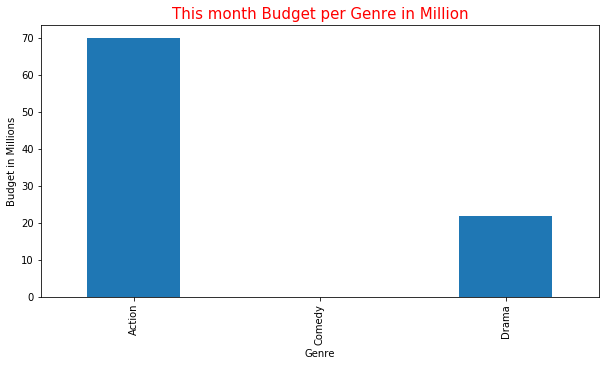

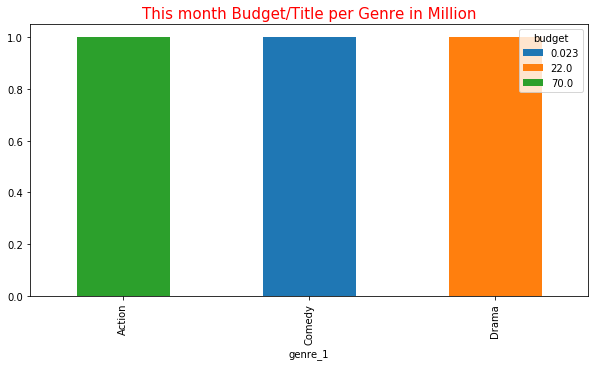

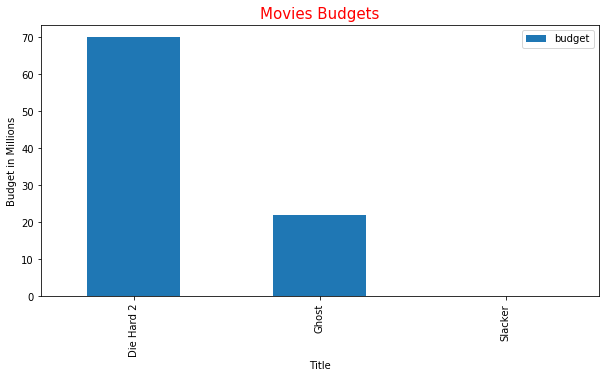

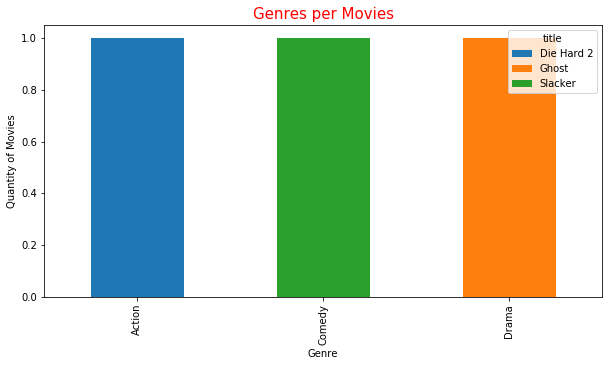

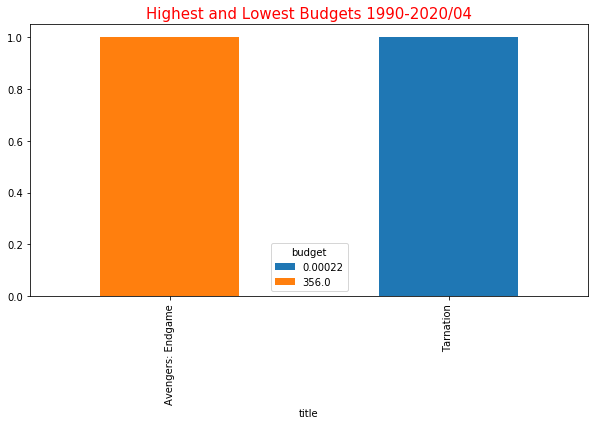

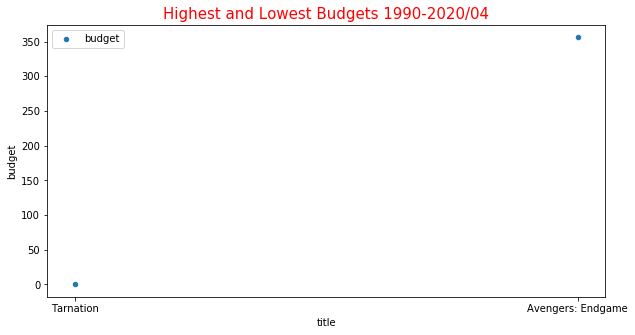

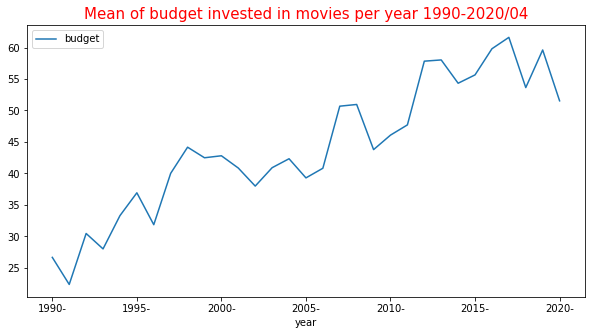

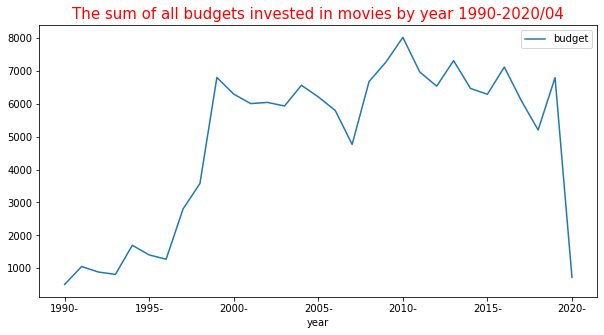

In [12]:
b = Date()
# b.Pandas_filter('1990-05-25')
# b.Pandas_filter('25 May 1990')
# b.method_date_input()
# b.method_date_input()
# b.method_date_input()
b.graphic_view()
# b.Testardor_input()


What movie name do you want to analize?
Example: Die Hard 2, or Get Out
	Type one name here->


        title       date  budget genre_1
3095  Get Out 2017-02-24     4.5  Horror


Type the date of this movie next!

What date do you want to analize?
Example: 21 November 2019, or 2019-11-21
	Type one style here->


        title       date  budget genre_1
4  Die Hard 2 1990-07-06    70.0  Action




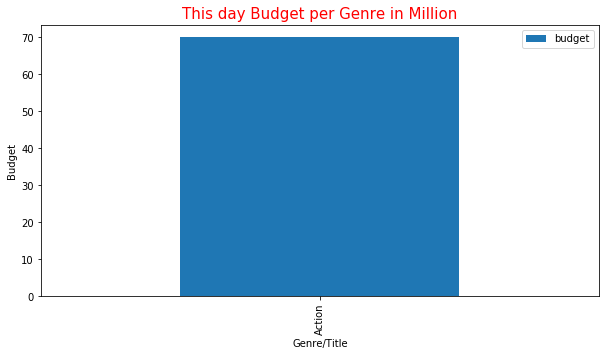

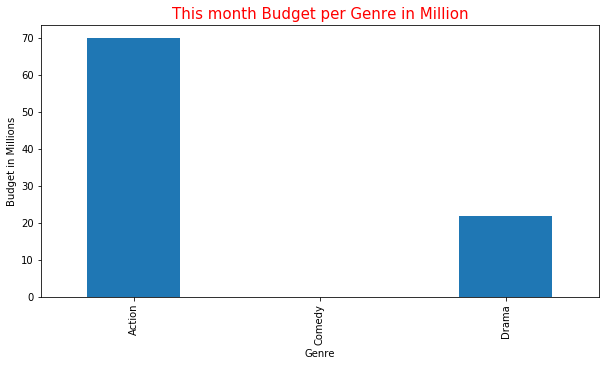

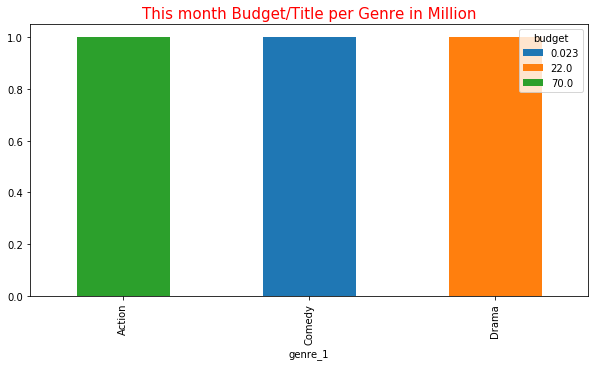

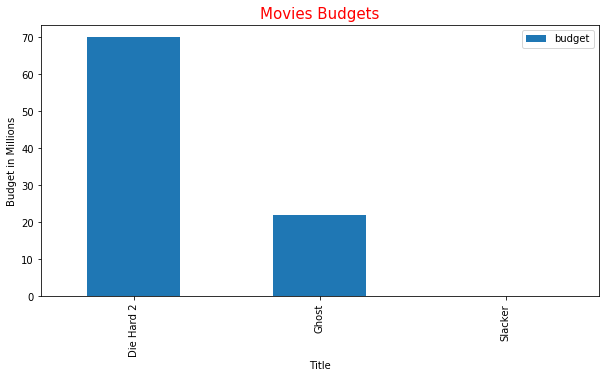

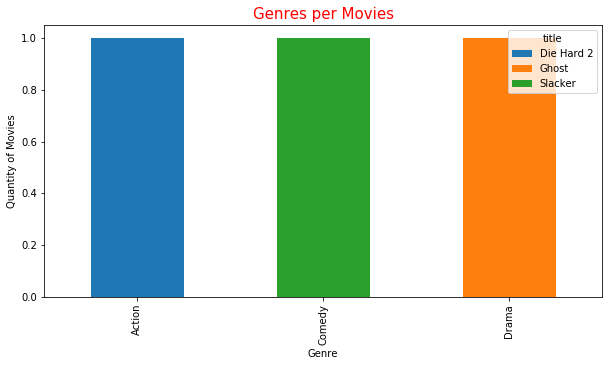

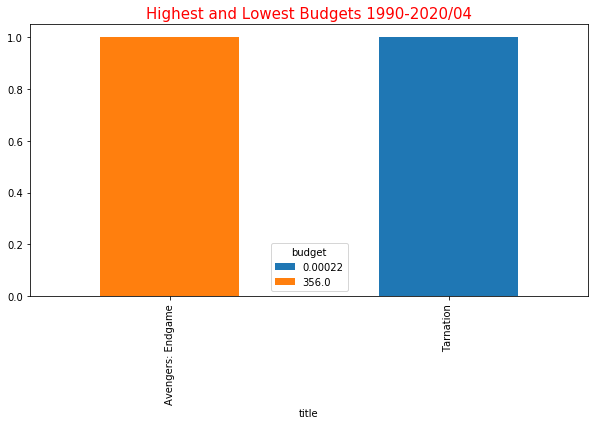

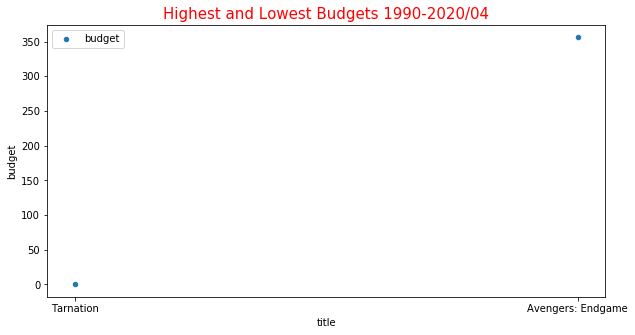

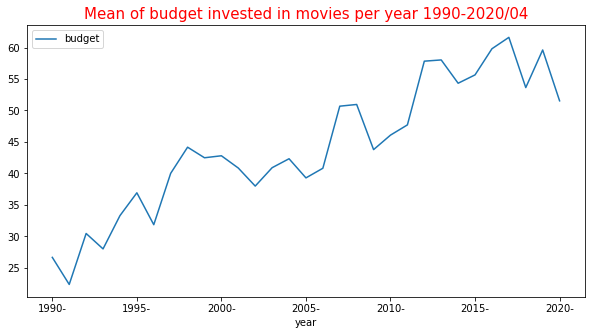

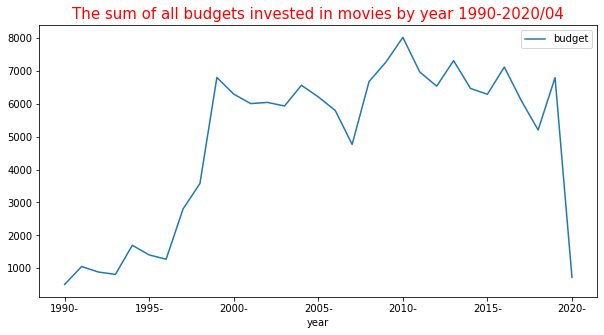

In [13]:
n = Name()
n.name_input()
# n.exists_input()